In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [3]:
first_group = pd.read_csv('data/less4/hw/first_group_sku.csv')
second_group = pd.read_csv('data/less4/hw/second_group_sku.csv')
third_group = pd.read_csv('data/less4/hw/third_group_sku.csv')

sku_dict = pd.read_csv('data/less4/hw/sku_dict.csv')
promo_df = pd.read_csv('data/less4/hw/promo_1510002.csv')
conc_df = pd.read_csv('data/less4/hw/conc_df.csv')

In [4]:
print(first_group.merge(sku_dict[['sku_id', 'vendor', 'brand_code']]
                  .rename(columns={'sku_id':'SKU'}), how='left', on='SKU').vendor.nunique())
print(first_group.merge(sku_dict[['sku_id', 'vendor', 'brand_code']]
                  .rename(columns={'sku_id':'SKU'}), how='left', on='SKU').brand_code.nunique())

2
1


In [5]:
print(second_group.merge(sku_dict[['sku_id', 'vendor', 'brand_code']]
                  .rename(columns={'sku_id':'SKU'}), how='left', on='SKU').vendor.nunique())
print(second_group.merge(sku_dict[['sku_id', 'vendor', 'brand_code']]
                  .rename(columns={'sku_id':'SKU'}), how='left', on='SKU').brand_code.nunique())

9
1


In [6]:
print(third_group.merge(sku_dict[['sku_id', 'vendor', 'brand_code']]
                  .rename(columns={'sku_id':'SKU'}), how='left', on='SKU').vendor.nunique())
print(third_group.merge(sku_dict[['sku_id', 'vendor', 'brand_code']]
                  .rename(columns={'sku_id':'SKU'}), how='left', on='SKU').brand_code.nunique())

8
1


In [7]:
pd.DataFrame({'file':['first_group.csv', 'second_group.csv', 'third_group.csv']
              , 'vendor_unique_number':[2,9,8], 'brand_unique_number':[1,1,1]}).to_csv('data/less4/hw/answer_list_1_1.csv'
                                                                                       , index=None)

In [8]:
agg_1 = first_group.groupby('SKU').price_per_sku.agg(['min','max']).reset_index()

In [9]:
agg_2 = second_group.groupby('SKU').price_per_sku.agg(['min','max']).reset_index()

In [10]:
agg_3 = third_group.groupby('SKU').price_per_sku.agg(['min','max']).reset_index()

In [11]:
pd.concat([agg_1,agg_2,agg_3]).to_csv('data/less4/hw/answer_list_1_2.csv', index=None)

<Axes: xlabel='dates'>

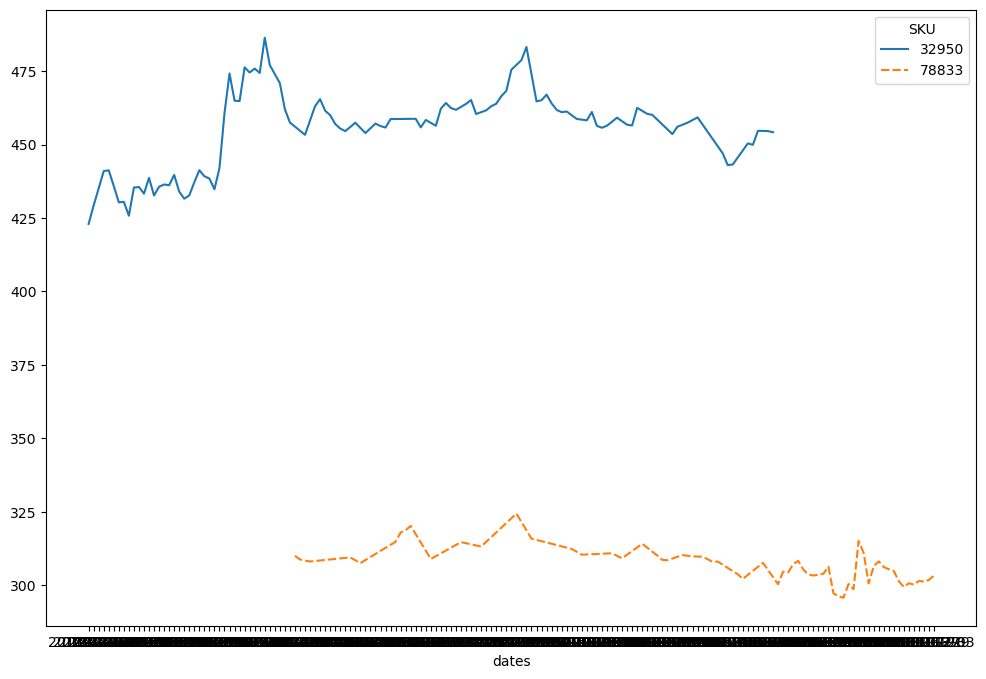

In [12]:
pivot_t = first_group.pivot_table(index='dates',columns='SKU', values='price_per_sku')
plt.figure(figsize=(12,8))
sns.lineplot(data =pivot_t)

In [13]:
first_group.price_per_sku.isnull().groupby(first_group.SKU).sum().astype(int).reset_index()\
.to_csv('data/less4/hw/answer_list_2.csv', index=None)

In [14]:
first_group['price_per_sku'] = first_group.groupby('SKU').price_per_sku.ffill()

<Axes: xlabel='num_purchases', ylabel='price_per_sku'>

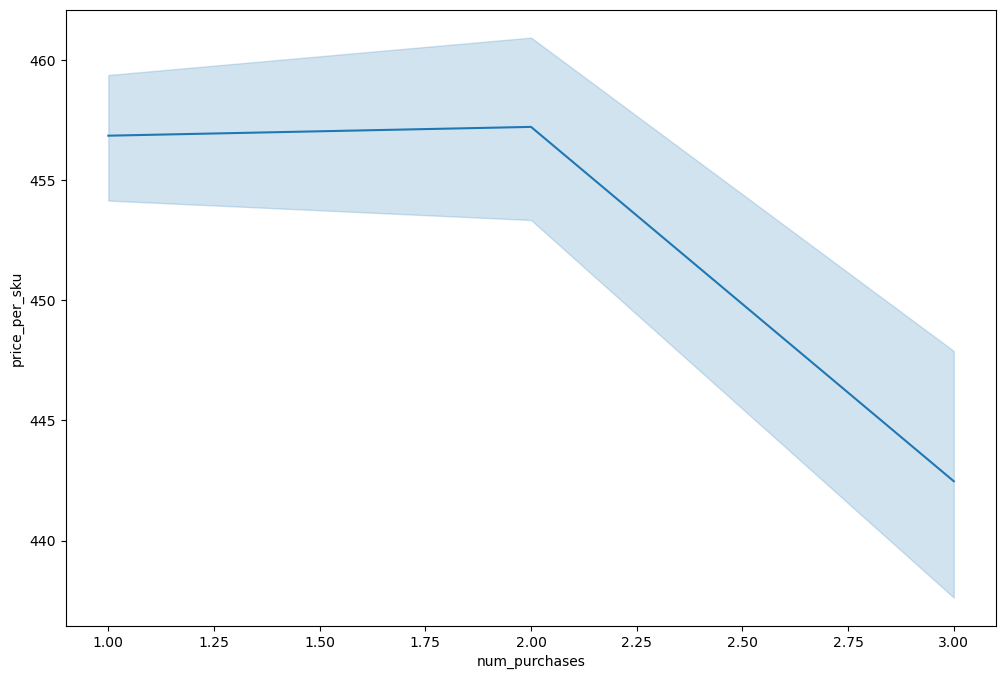

In [15]:
plt.figure(figsize=(12,8))

sns.lineplot(x=first_group[first_group.SKU == 32950].num_purchases , y=first_group[first_group.SKU == 32950].price_per_sku)

<Axes: xlabel='num_purchases', ylabel='price_per_sku'>

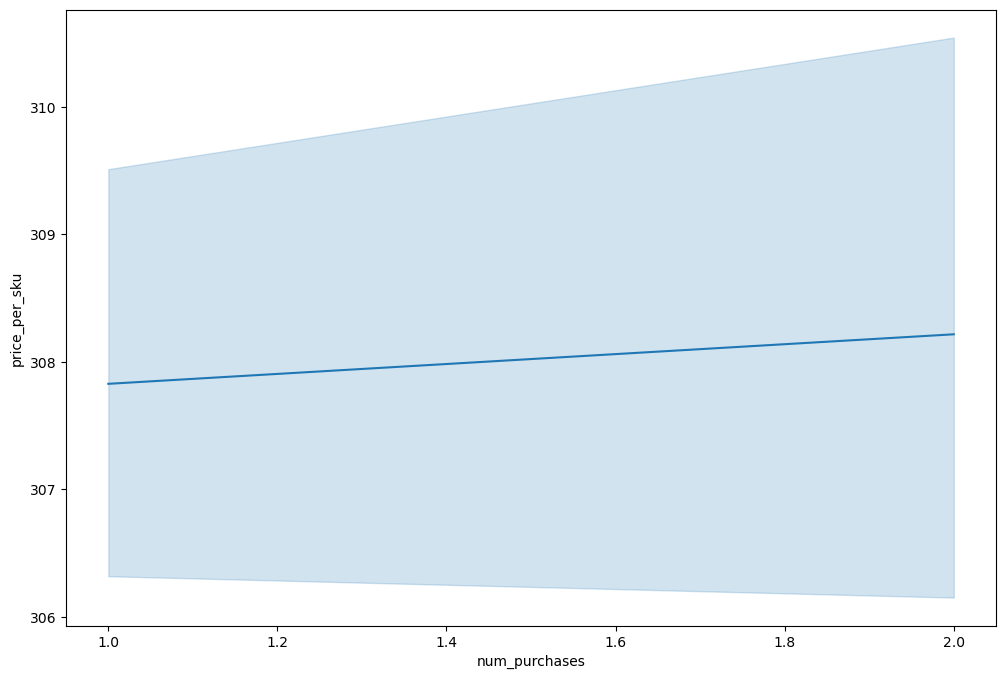

In [16]:
plt.figure(figsize=(12,8))

sns.lineplot(x =first_group[first_group.SKU == 78833].num_purchases , y = first_group[first_group.SKU == 78833].price_per_sku)

In [17]:
promo_df

,year,week_num,SKU,discount
0,2019,1,90611,0.90
1,2019,2,10334,0.90
2,2019,3,68211,0.90
3,2019,4,10334,0.90
4,2019,5,72784,0.80
5,2019,6,68211,0.90
6,2019,7,38767,0.90
7,2019,8,83329,0.90
8,2019,9,83329,0.95
9,2019,10,90611,0.90


In [18]:
promo_df.shape

(52, 4)

In [19]:
promo_df.SKU.value_counts().reset_index().rename(columns= {'index':'SKU', 'SKU':'promo_count'})

,promo_count,count
0,10334,8
1,17812,8
2,57561,7
3,90611,6
4,38767,5
5,43678,4
6,72784,3
7,83329,3
8,36096,3
9,68211,2


In [20]:
promo_df.SKU.value_counts().reset_index().rename(columns= {'index':'SKU', 'SKU':'promo_count'})\
.to_csv('data/less4/hw/answer_list_3_1.csv', index=None)

In [21]:
promo_df

,year,week_num,SKU,discount
0,2019,1,90611,0.90
1,2019,2,10334,0.90
2,2019,3,68211,0.90
3,2019,4,10334,0.90
4,2019,5,72784,0.80
5,2019,6,68211,0.90
6,2019,7,38767,0.90
7,2019,8,83329,0.90
8,2019,9,83329,0.95
9,2019,10,90611,0.90


In [22]:
second_group.dates = pd.to_datetime(second_group.dates)

In [23]:
second_group['year'] = second_group.dates.dt.year
second_group['week_num'] = second_group.dates.dt.isocalendar().week

In [24]:
second_group = second_group.merge(promo_df, how='left', on=['SKU','year','week_num'])

In [25]:
second_group['is_discount'] = np.where(second_group.discount.isnull(), 0,1)

In [26]:
second_group[second_group.is_discount==1]

,dates,SKU,price_per_sku,num_purchases,year,week_num,discount,is_discount
190,2019-01-07,10334,85.5729,13,2019,2,0.9,1
191,2019-01-08,10334,85.5729,11,2019,2,0.9,1
192,2019-01-09,10334,85.5729,12,2019,2,0.9,1
193,2019-01-10,10334,85.5729,12,2019,2,0.9,1
194,2019-01-11,10334,85.5729,14,2019,2,0.9,1
...,...,...,...,...,...,...,...,...
3636,2019-11-18,90611,73.2368,8,2019,47,0.8,1
3637,2019-11-19,90611,73.2368,7,2019,47,0.8,1
3638,2019-11-20,90611,73.2368,7,2019,47,0.8,1
3639,2019-11-23,90611,73.2368,7,2019,47,0.8,1


In [27]:
second_group.groupby('SKU').is_discount.sum()

SKU
10334    45
17812    46
36096    13
38767    27
43678    22
57561    33
64619     5
68211     9
69997    11
72784    15
83329    15
90611    31
98255     0
Name: is_discount, dtype: int64

In [28]:
second_group.SKU.unique()

array([10334, 17812, 36096, 38767, 43678, 57561, 64619, 68211, 69997,
       72784, 83329, 90611, 98255])

In [29]:
second_group.groupby(['SKU','is_discount']).num_purchases.mean()\
.reset_index()\
.pivot_table(index = 'SKU', columns='is_discount', values='num_purchases').reset_index()\
[['SKU', 1,0]]\
.rename(columns={1:'mean_num_purchases_promo', 0:'mean_num_purchases_wo_promo'}).to_csv('data/less4/hw/answer_list_3_2.csv', index=None)

In [30]:
second_group.groupby(['SKU','is_discount']).num_purchases.mean()\
.reset_index()\
.pivot_table(index = 'SKU', columns='is_discount', values='num_purchases').reset_index()\
[['SKU', 1,0]]\
.rename(columns={1:'mean_num_purchases_promo', 0:'mean_num_purchases_wo_promo'})

is_discount,SKU,mean_num_purchases_promo,mean_num_purchases_wo_promo
0,10334,11.977778,9.980050
1,17812,5.934783,3.613636
2,36096,12.923077,11.414634
3,38767,10.222222,9.000000
4,43678,12.090909,9.448276
5,57561,9.727273,8.050378
6,64619,5.800000,4.329897
7,68211,13.111111,11.459350
8,69997,7.818182,4.333333
9,72784,9.133333,6.953782


In [31]:
conc_df

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.69400
1,84395,2019,18,2,164.69400
2,84395,2019,18,3,134.50010
3,84395,2019,22,1,165.19800
4,84395,2019,22,2,136.28835
...,...,...,...,...,...
3004,89272,2019,18,2,133.93820
3005,89272,2019,18,3,121.76200
3006,80308,2019,47,1,115.77984
3007,80308,2019,47,2,118.19192


In [32]:
conc_df.SKU.value_counts()

SKU
80308    453
84395    399
89272    396
49661    387
11050    384
54404    384
80631    261
19632    147
60870    105
24125     93
Name: count, dtype: int64

In [33]:
conc_df.groupby('SKU').price_per_sku.count().reset_index()\
.rename(columns={'price_per_sku':'conc_rows_count'})\
.to_csv('data/less4/hw/answer_list_4_1.csv', index=None)

In [34]:
conc_df.groupby('SKU').price_per_sku.count().reset_index().rename(columns={'price_per_sku':'conc_rows_count'})

,SKU,conc_rows_count
0,11050,384
1,19632,147
2,24125,93
3,49661,387
4,54404,384
5,60870,105
6,80308,453
7,80631,261
8,84395,399
9,89272,396


In [35]:
conc_df.groupby(['SKU', 'year', 'week_num']).price_per_sku.agg(['min', 'max']).reset_index()

,SKU,year,week_num,min,max
0,11050,2019,1,101.25600,126.5700
1,11050,2019,2,103.45370,126.6780
2,11050,2019,3,100.35456,125.4432
3,11050,2019,4,101.91360,105.0984
4,11050,2019,5,101.26848,126.5856
...,...,...,...,...,...
365,89272,2019,47,118.96128,148.7016
366,89272,2019,49,119.13600,136.5100
367,89272,2019,50,122.61696,153.2712
368,89272,2019,51,119.99616,149.9952


In [36]:
aggr_conc = conc_df.groupby(['SKU', 'year', 'week_num']).price_per_sku.agg(['min', 'max']).reset_index()

In [37]:
third_group.dates = pd.to_datetime(third_group.dates)

In [38]:
third_group['year'] = third_group.dates.dt.year
third_group['week_num'] = third_group.dates.dt.isocalendar().week

In [39]:
third_group = third_group.merge(aggr_conc
                  , how='left', on=['SKU', 'year', 'week_num'])

In [40]:
third_group['lower_than'] = np.where(third_group.price_per_sku <= third_group['min'], 1,0)

In [41]:
third_group.groupby('SKU').lower_than.sum().reset_index()

,SKU,lower_than
0,11050,0
1,19632,0
2,24125,0
3,49661,3
4,54404,13
5,60870,0
6,80308,0
7,80631,0
8,84395,14
9,89272,7


In [42]:
third_group.groupby('SKU').lower_than.sum().reset_index().to_csv('data/less4/hw/answer_list_4_2.csv', index=None)

In [43]:
third_group[third_group.lower_than == 1]

,dates,SKU,price_per_sku,num_purchases,year,week_num,min,max,lower_than
680,2019-07-16,49661,161.960,12,2019,29,161.960,194.3520,1
681,2019-07-19,49661,161.960,12,2019,29,161.960,194.3520,1
682,2019-07-20,49661,161.960,12,2019,29,161.960,194.3520,1
850,2019-03-04,54404,81.124,12,2019,10,81.124,81.1240,1
851,2019-03-05,54404,81.124,14,2019,10,81.124,81.1240,1
852,2019-03-06,54404,81.124,12,2019,10,81.124,81.1240,1
875,2019-04-15,54404,83.504,12,2019,16,83.504,100.2048,1
876,2019-04-17,54404,83.504,14,2019,16,83.504,100.2048,1
877,2019-04-19,54404,83.504,12,2019,16,83.504,100.2048,1
878,2019-04-20,54404,83.504,12,2019,16,83.504,100.2048,1


In [44]:
test = pd.read_csv('data/less4/hw/test.csv')

In [45]:
test['dates'] = pd.to_datetime(test['dates'])

In [46]:
test

,dates,SKU
0,2018-12-17,98255
1,2018-12-21,98255
2,2018-12-22,98255
3,2018-12-23,98255
4,2018-12-24,98255
...,...,...
170,2019-12-31,80631
171,2019-12-31,19632
172,2019-12-31,84395
173,2019-12-31,43678


In [47]:
test.SKU.value_counts()

SKU
98255    7
83329    7
10334    7
80308    7
38767    7
19632    7
84395    7
54404    7
80631    7
36096    7
90611    7
89272    7
17812    7
68211    7
64619    7
72784    7
11050    7
43678    7
78833    7
57561    7
69997    7
24125    7
32950    7
60870    7
49661    7
Name: count, dtype: int64

# План (прост потому красив)

### Прогнозируем спрос (потому, что у нас нет плана продаж)

### Строим зависмости спроса от цены
### Выбираем цену
 

In [48]:
from prophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [49]:
combine_data = pd.concat([first_group, second_group, third_group]).reset_index(drop=True)

In [50]:
combine_data.dates = pd.to_datetime(combine_data.dates)

In [51]:
combine_data = combine_data[['dates', 'SKU', 'price_per_sku', 'num_purchases']]

In [52]:
model_dict = {}
for sku in combine_data.SKU.unique():
    if sku not in [32950, 78833]:
        df = combine_data[combine_data.SKU == sku]
        prophet_df = df[['dates', 'num_purchases']].rename(columns={'dates': 'ds', 'num_purchases': 'y'})
        test_df = test[test.SKU == sku].rename(columns={'dates': 'ds'})

        m = Prophet(yearly_seasonality=True)
        m.fit(prophet_df)
        pred = m.predict(test_df)[['ds', 'yhat']]
        pred['num_purchases'] = pred['yhat'].round()
        print(pred)

        df['num_purchases_2'] = df['num_purchases']**2
        df['num_purchases_3'] = df['num_purchases']**3
        x_poly = df[['num_purchases', 'num_purchases_2', 'num_purchases_3']]

        df['num_purchases_2'] = df['num_purchases']**2
        df['num_purchases_3'] = df['num_purchases']**3
        x_test_poly = df[['num_purchases', 'num_purchases_2', 'num_purchases_3']]

        # LinearRegression model is not good enought example
        # Choose different, better model
        model = LinearRegression()
        model.fit(x_poly, df['price_per_sku'])

        y_pred_test = model.predict(x_test_poly)
        model_dict[sku] = (pred, y_pred_test)
        break
    else:
        continue



14:01:55 - cmdstanpy - INFO - Chain [1] start processing
14:01:55 - cmdstanpy - INFO - Chain [1] done processing


          ds      yhat  num_purchases
0 2019-12-25  9.572363           10.0
1 2019-12-26  9.624016           10.0
2 2019-12-27  9.590177           10.0
3 2019-12-28  9.828664           10.0
4 2019-12-29  9.927447           10.0
5 2019-12-30  9.923580           10.0
6 2019-12-31  9.917739           10.0


/var/folders/wt/fs62y8p10lxgyr__1q15y4_m0000gn/T/ipykernel_4146/4024161680.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_purchases_2'] = df['num_purchases']**2
/var/folders/wt/fs62y8p10lxgyr__1q15y4_m0000gn/T/ipykernel_4146/4024161680.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_purchases_3'] = df['num_purchases']**3
/var/folders/wt/fs62y8p10lxgyr__1q15y4_m0000gn/T/ipykernel_4146/4024161680.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [53]:
model_dict

{10334: (          ds      yhat  num_purchases
  0 2019-12-25  9.572363           10.0
  1 2019-12-26  9.624016           10.0
  2 2019-12-27  9.590177           10.0
  3 2019-12-28  9.828664           10.0
  4 2019-12-29  9.927447           10.0
  5 2019-12-30  9.923580           10.0
  6 2019-12-31  9.917739           10.0,
  array([ 96.77832747,  94.63795266,  96.77832747,  91.86019773,
          96.77832747,  96.77832747,  96.77832747,  96.77832747,
          91.86019773,  94.63795266,  94.63795266,  96.77832747,
          94.63795266,  94.63795266,  94.63795266,  96.77832747,
          94.63795266,  96.77832747,  96.77832747,  94.63795266,
          94.63795266,  91.86019773,  96.77832747,  91.86019773,
          94.63795266,  94.63795266,  96.77832747,  96.77832747,
          94.63795266,  96.77832747,  96.77832747,  94.63795266,
          96.77832747,  94.63795266,  94.63795266,  96.77832747,
          96.77832747,  96.77832747,  94.63795266,  96.77832747,
          94.63795266,

# Как не стоит делать

In [54]:
from statsmodels.tsa.arima.model import ARIMA
predictions = {}
for sku in combine_data.SKU.unique():
    train_data = combine_data[combine_data.SKU == sku].price_per_sku.values
    MA = ARIMA(train_data, order=(0, 0, 20))
    MA_model = MA.fit()
    predictions[sku] = MA_model.predict(start=len(train_data), end=len(train_data + 7 - 1))

/Users/adwiz/miniconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/adwiz/miniconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adwiz/miniconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adwiz/miniconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

In [55]:
predictions

{32950: array([450.47542173]),
 78833: array([303.89010216]),
 10334: array([99.82589389]),
 17812: array([70.04250253]),
 36096: array([131.54141328]),
 38767: array([74.19163815]),
 43678: array([149.16847832]),
 57561: array([97.97419083]),
 64619: array([153.12804982]),
 68211: array([163.94179033]),
 69997: array([139.7601772]),
 72784: array([134.77222731]),
 83329: array([88.79983575]),
 90611: array([90.01547185]),
 98255: array([67.47902297]),
 11050: array([110.37944252]),
 19632: array([156.99211373]),
 24125: array([110.14263496]),
 49661: array([165.83343589]),
 54404: array([85.63200868]),
 60870: array([117.19963162]),
 80308: array([119.5409875]),
 80631: array([91.42934372]),
 84395: array([140.59475138]),
 89272: array([124.8962533])}

In [56]:
test['predicted_price'] = 0
for sku in test.SKU.unique():
    test.loc[test.SKU == sku, 'predicted_price' ] = predictions[sku]
test.to_csv('data/less4/hw/answer_test_sku_2.csv')

ValueError: Must have equal len keys and value when setting with an iterable

In [57]:
test

,dates,SKU,predicted_price
0,2018-12-17,98255,0
1,2018-12-21,98255,0
2,2018-12-22,98255,0
3,2018-12-23,98255,0
4,2018-12-24,98255,0
...,...,...,...
170,2019-12-31,80631,0
171,2019-12-31,19632,0
172,2019-12-31,84395,0
173,2019-12-31,43678,0


In [58]:
from sklearn.metrics import mean_squared_error
answers = pd.read_csv('data/less4/hw/answer_test_sku_2.csv')
answers

FileNotFoundError: [Errno 2] No such file or directory: 'data/less4/hw/answer_test_sku_2.csv'

In [59]:
mean_squared_error(answers.price_per_sku, answers.predicted_price, squared=False)

NameError: name 'answers' is not defined